In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [9]:
df = pd.read_csv('csv/midterm_dataset/melb_data.csv')

In [10]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [11]:
df = df.drop(["Address", "SellerG", "Date", "Postcode", "CouncilArea", "Regionname", "Suburb", "Method"], axis=1)

In [12]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)

In [13]:
df_imputed["Type"] = df["Type"].map({'h': 0, 'u': 1, 't': 2})

In [14]:
df_imputed = df_imputed.dropna()

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

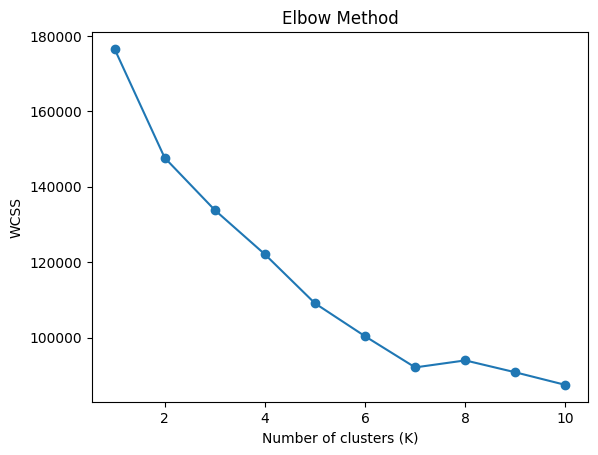

In [17]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(scaled_data)

In [19]:
df_imputed['Cluster'] = clusters

In [20]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

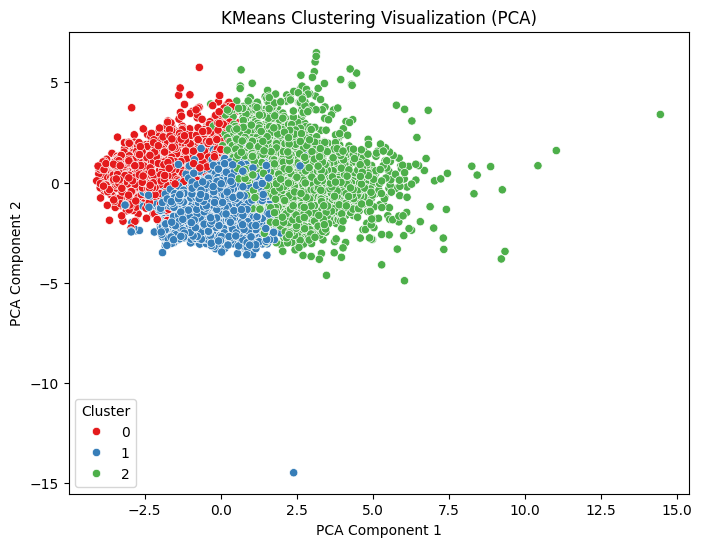

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='Set1')
plt.title('KMeans Clustering Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

**1. Does preprocessing affect the result of the model? Why?**  
- Yes, preprocessing plays an important role in how K-means works. Using StandardScaler() helps keep all features on the same level so that big numbers like Price or Landsize do not control the results. Using SimpleImputer to fill missing values keeps the data complete and avoids errors during clustering.

**2. What is your conclusion based on the interpretation or result of your model?**  
- The K-means clustering showed three clear groups based on the PCA plot. The model grouped properties with similar features like price, number of rooms, and size. This means the dataset has patterns that K-means was able to find successfully.